In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
X = data.loc[:,"Time":"Amount"]
Y = data["Class"]

In [5]:
print(X.head())
print(X.shape)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27 

In [6]:
n_frauds = Y.value_counts()[1]
n_not_frauds = Y.value_counts()[0]
print(f"Number of fraudulent transactions: {n_frauds}")
print(f"Number of normal transactions: {n_not_frauds}")
print(f"Percentage of fraudulent transactions: {n_frauds/(n_frauds+n_not_frauds) * 100} %")

Number of fraudulent transactions: 492
Number of normal transactions: 284315
Percentage of fraudulent transactions: 0.1727485630620034 %


In [7]:
from sklearn.preprocessing import StandardScaler

X[["Time", "Amount"]] = StandardScaler().fit_transform(X[["Time", "Amount"]])

In [8]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(X)

In [10]:
principal_com_df = pd.DataFrame(data= principal_components, columns = ['PC1', 'PC2'])

In [11]:
principal_com_df_with_gt = pd.concat([principal_com_df, Y], axis=1)

In [12]:
principal_com_df_with_gt.head()

,PC1,PC2,Class
0,1.571684,-0.675672,0
1,-1.086224,-0.282756,0
2,2.053417,1.077602,0
3,1.150107,-0.427350,0
4,1.143807,-1.341919,0


In [13]:
import matplotlib.pyplot as plt

In [14]:
print(principal_com_df_with_gt.shape)

(284807, 3)


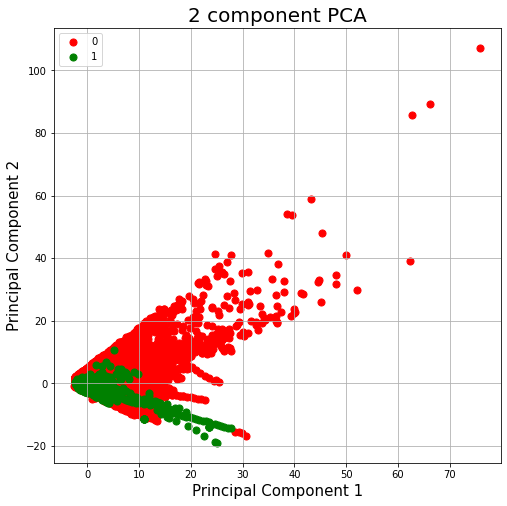

In [15]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principal_com_df_with_gt['Class'] == target
    ax.scatter(principal_com_df_with_gt.loc[indicesToKeep, 'PC1']
               , principal_com_df_with_gt.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<AxesSubplot:>

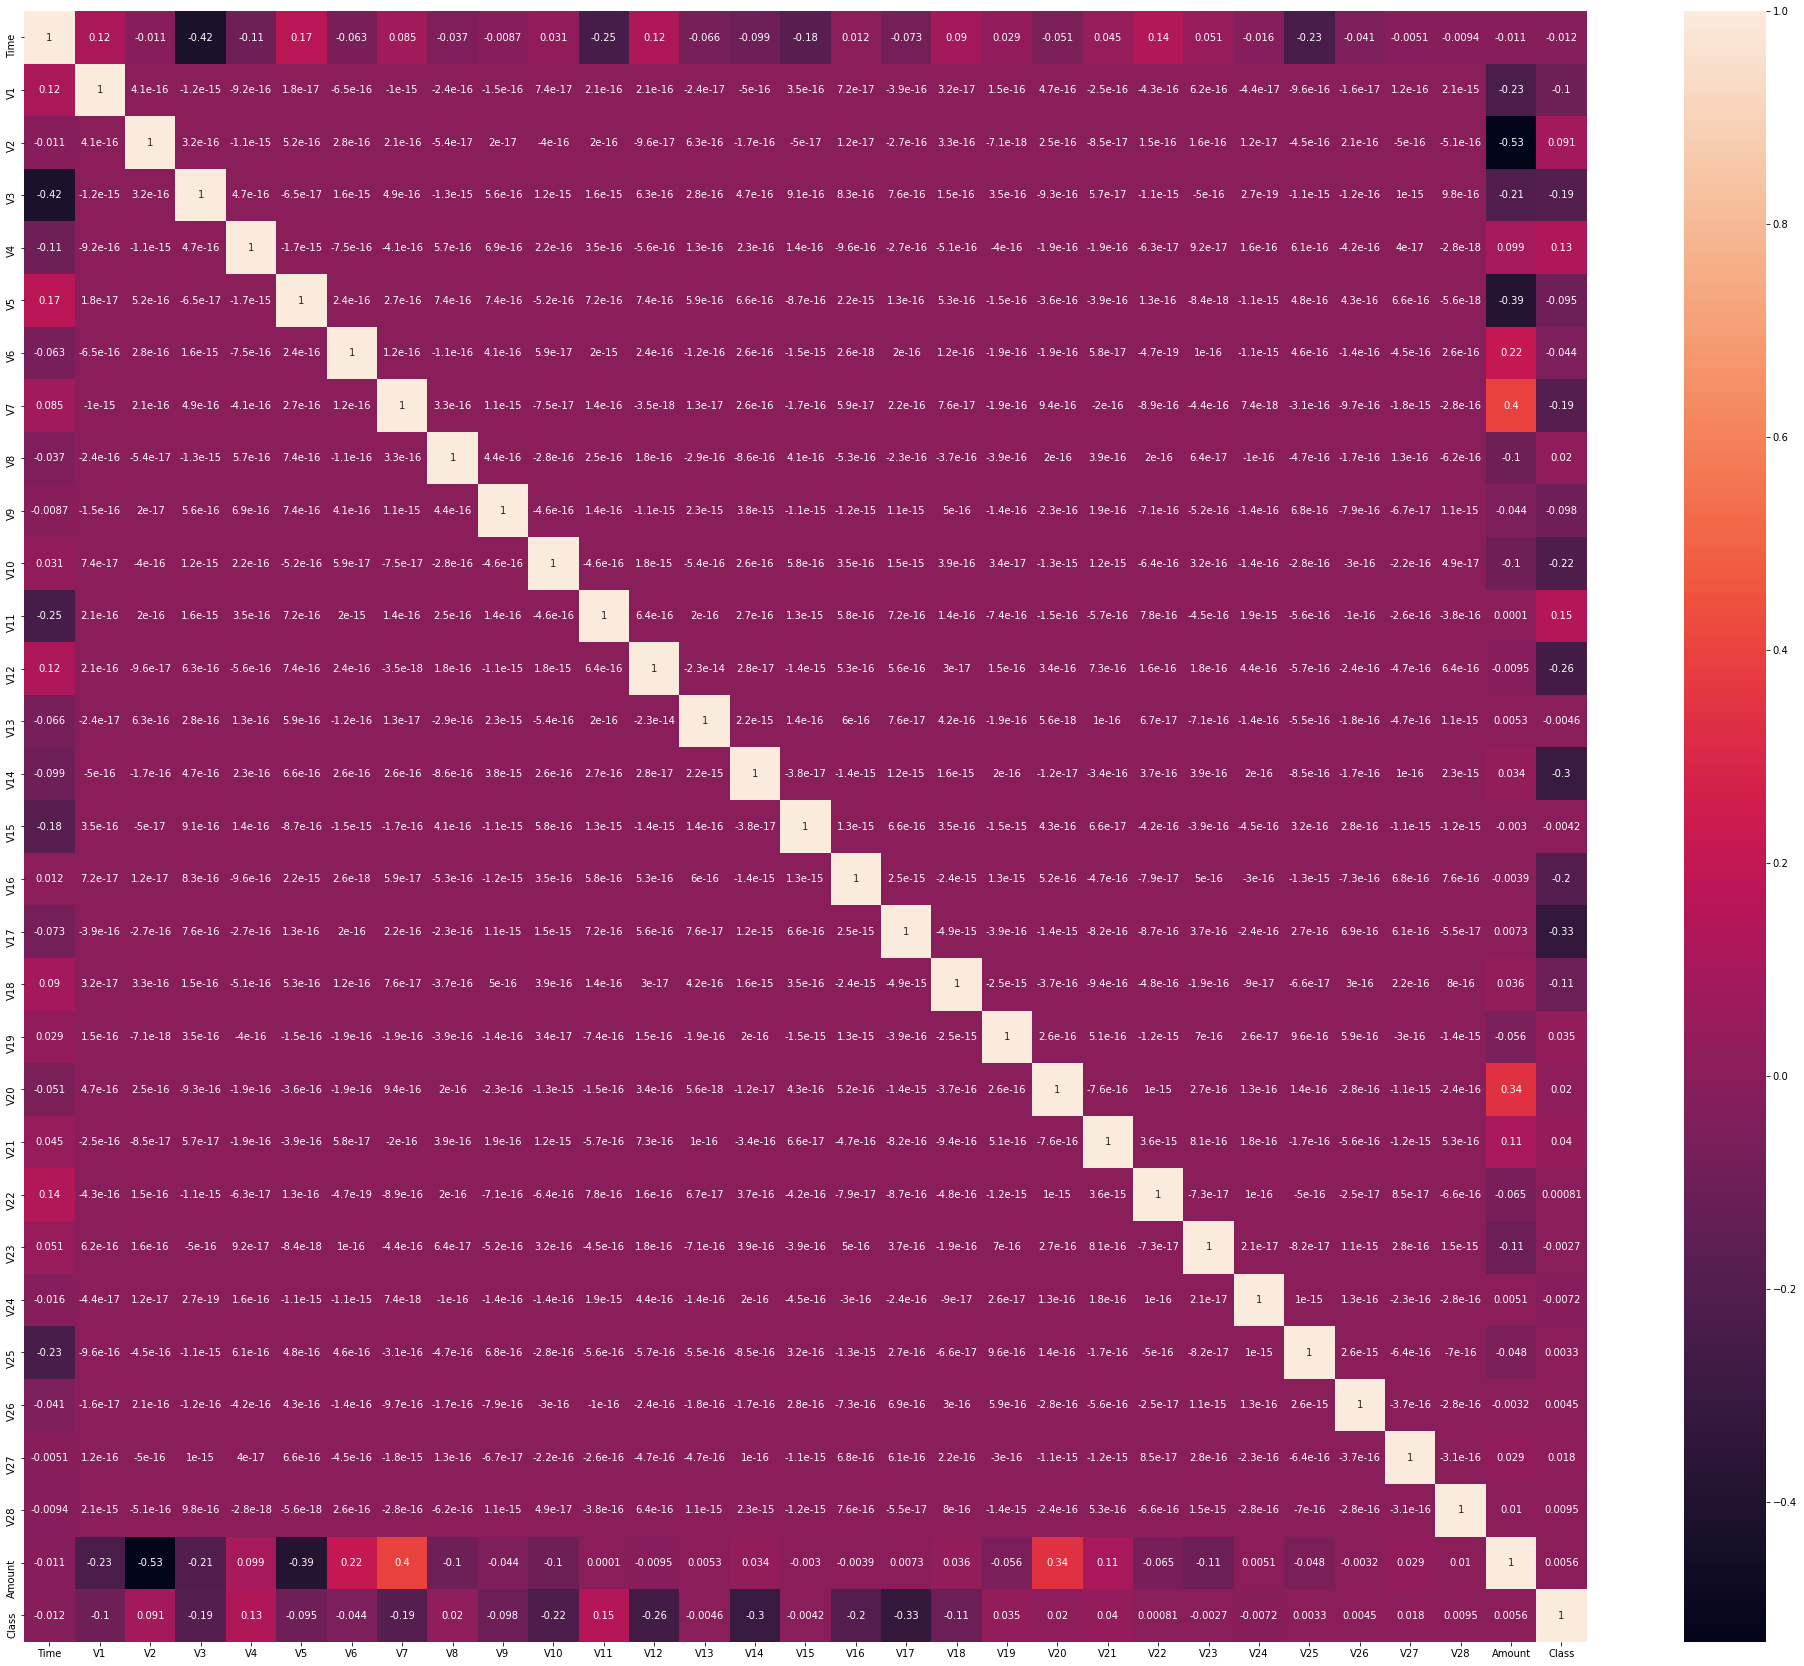

In [16]:
#Visualize correlation matrix
import seaborn as sn
fig, ax = plt.subplots(figsize=(35,30))         # Sample figsize in inches
correlation_matrix = pd.concat([X, Y], axis=1).corr()
sn.heatmap(correlation_matrix, annot=True)



In [17]:
# Let's explore how a simple Logistic Regression Model performs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)


In [18]:
n_frauds_train = Y_train.value_counts()[1]
n_not_frauds_train = Y_train.value_counts()[0]
n_frauds_test = Y_test.value_counts()[1]
n_not_frauds_test = Y_test.value_counts()[0]

print(f"Percentage of fraudulent transactions in training set: {n_frauds_train/(n_frauds_train+n_not_frauds_train) * 100} %")
print(f"Percentage of fraudulent transactions in test set: {n_frauds_test/(n_frauds_test+n_not_frauds_test) * 100} %")

Percentage of fraudulent transactions in training set: 0.17292457591783889 %
Percentage of fraudulent transactions in test set: 0.17204452090867595 %


In [19]:
print(n_frauds_train)
print(n_frauds_test)

394
98


In [20]:
logistic_r = LogisticRegression()

logistic_r.fit(X_train, Y_train)

LogisticRegression()

In [21]:
print(f"Overall train accuracy is: {logistic_r.score(X_train, Y_train)*100}%")
print(f"Overall test accuracy is: {logistic_r.score(X_test, Y_test)*100}%")


Overall train accuracy is: 99.92407118874674%
Overall test accuracy is: 99.93153330290369%


Confusion matrix, without normalization
[[56852    12]
 [   27    71]]
Normalized confusion matrix
[[1.00e+00 2.11e-04]
 [2.76e-01 7.24e-01]]


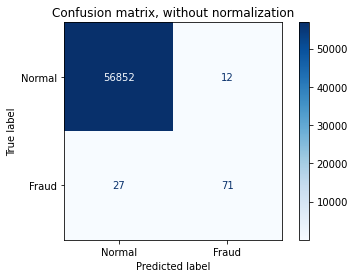

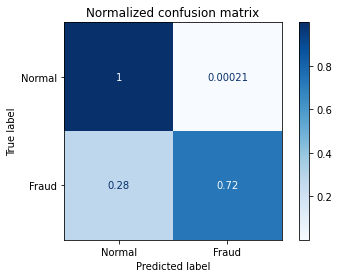

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logistic_r, X_test, Y_test,
                                 display_labels=["Normal", "Fraud"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [23]:
from sklearn.metrics import f1_score
predicted_test = logistic_r.predict(X_test)
test_f1_score = f1_score(Y_test, predicted_test)
print(f"Test F1 score is {test_f1_score}")

Test F1 score is 0.7845303867403315


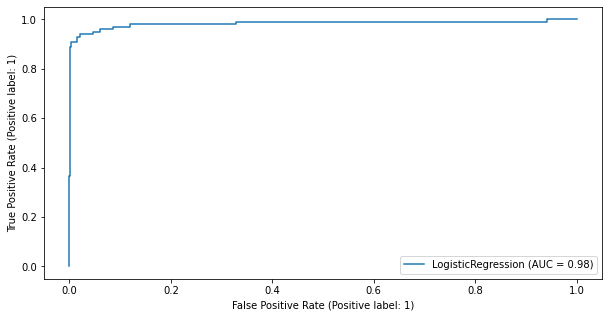

In [24]:
from sklearn.metrics import roc_curve, auc, plot_roc_curve
roc_curve = plot_roc_curve(logistic_r, X_test, Y_test)
roc_curve.figure_.set_size_inches(10, 5)
plt.show()  


In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, logistic_r.decision_function(X_test))

0.9831003870315712

In [26]:
type(X)

pandas.core.frame.DataFrame

In [27]:
# Try same algorithm after we removed irrelevant features according to correlation matrix
irrelevant_features = ["Time", "V13", "V15", "V22", "V23", "V24", "V25", "V26", "V28"]

X_pruned = X.drop(columns=irrelevant_features)
print(X_pruned.shape)

(284807, 21)


Overall train accuracy is: 99.92187671443305%
Overall test accuracy is: 99.91046662687407%
Confusion matrix, without normalization
[[56853    11]
 [   40    58]]
Normalized confusion matrix
[[1.00e+00 1.93e-04]
 [4.08e-01 5.92e-01]]


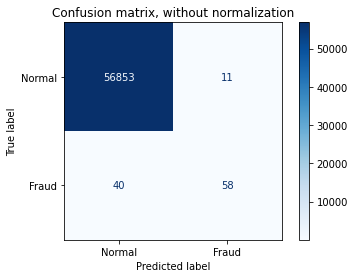

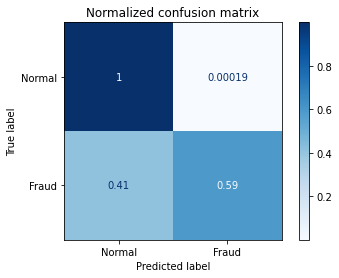

Test F1 score is 0.6946107784431138


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

logistic_r = LogisticRegression()

logistic_r.fit(X_train, Y_train)

print(f"Overall train accuracy is: {logistic_r.score(X_train, Y_train)*100}%")
print(f"Overall test accuracy is: {logistic_r.score(X_test, Y_test)*100}%")

# Plot non-normalized confusion matrix

for title, normalize in titles_options:
    disp = plot_confusion_matrix(logistic_r, X_test, Y_test,
                                 display_labels=["Normal", "Fraud"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

predicted_test = logistic_r.predict(X_test)
test_f1_score = f1_score(Y_test, predicted_test)
print(f"Test F1 score is {test_f1_score}")


In [29]:
# We'll use cross validation to evaluate the performance of our model
# And we won't use a separate test set (instead, we'll use the average of the test scores
#given in the cross validation)

from sklearn.model_selection import StratifiedShuffleSplit
n_splits = 5
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2)

In [30]:
X.shape

(284807, 30)

In [31]:
for train_index, test_index in sss.split(X.values, Y.values):
    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = Y.values[train_index], Y.values[test_index]
    print("X_train shape: ", X_train.shape)
    print("Fraud examples Y_train:",  np.count_nonzero(Y_train == 1))

X_train shape:  (227845, 30)
Fraud examples Y_train: 394
X_train shape:  (227845, 30)
Fraud examples Y_train: 394
X_train shape:  (227845, 30)
Fraud examples Y_train: 394
X_train shape:  (227845, 30)
Fraud examples Y_train: 394
X_train shape:  (227845, 30)
Fraud examples Y_train: 394


In [32]:
from sklearn.svm import SVC

In [ ]:
sum_acc = 0
sum_f1 = 0
idx = 1
for train_index, test_index in sss.split(X.values, Y.values):
    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = Y.values[train_index], Y.values[test_index]
    svc = SVC(class_weight="balanced", random_state=10)
    svc.fit(X_train, Y_train)
    train_acc = svc.score(X_train, Y_train)*100
    test_acc = svc.score(X_test, Y_test)*100
    print(f"Train accuracy batch {idx}: {train_acc}%")
    print(f"Test accuracy batch {idx}: {test_acc}%")
    predicted_probs = svc.predict(X_test)
    pred_f1_score = f1_score(Y_test, predicted_probs)
    print(f"Test F1 score: {pred_f1_score}")
    sum_acc += train_acc
    sum_f1 += pred_f1_score
    idx +=1
    
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(svc, X_test, Y_test,
                                     display_labels=["Normal", "Fraud"],
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        
print(f"Average test accuracy is {sum_acc/ n_splits}")
print(f"Average test f1 score is {sum_f1/ n_splits}")
        

    

    


In [45]:
#Now train model on full dataset and save it
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

X = data.loc[:,"Time":"Amount"]
Y = data["Class"]
print(X.shape)
print(Y.shape)

col_trans = ColumnTransformer([("Scaler", StandardScaler(), ["Time", "Amount"])], remainder="passthrough")

col_trans.fit(X)
X = col_trans.transform(X)
print(X.shape)
print(X[1000:1001])

(284807, 30)
(284807,)
(284807, 30)
[[-1.98 -0.34 -1.37  0.92 -0.78  0.9   0.74 -0.96  0.53  0.06 -0.17  0.69
  -1.34 -0.09  0.34  0.51  0.79 -0.18 -0.36  0.13  0.77 -0.39 -0.02  0.51
   0.53 -0.44 -0.39 -0.36  0.19  0.19]]


In [76]:
print(col_trans.get_feature_names)

<bound method ColumnTransformer.get_feature_names of ColumnTransformer(remainder='passthrough',
                  transformers=[('Scaler', StandardScaler(),
                                 ['Time', 'Amount'])])>


In [46]:
svc = SVC(class_weight="balanced", random_state=10)
svc.fit(X, Y)

SVC(class_weight='balanced', random_state=10)

F1 score: 0.5632512879221523


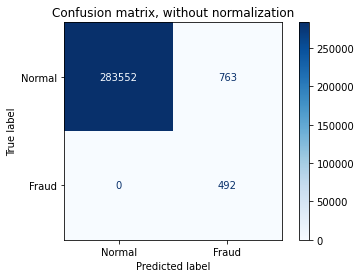

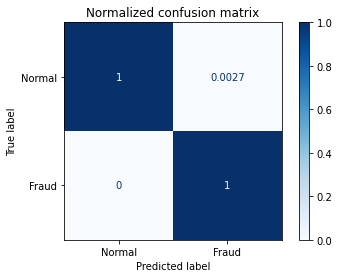

In [52]:
predicted_probs = svc.predict(X)
pred_f1_score = f1_score(Y, predicted_probs)
print(f"F1 score: {pred_f1_score}")

titles_options = [("Confusion matrix, without normalization", None),
              ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X, Y,
                                 display_labels=["Normal", "Fraud"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

In [50]:
pipeline = Pipeline([("Scaler", col_trans), ("Classifier", svc)])

In [51]:
from joblib import dump, load

dump(pipeline, "svc.joblib")


['svc.joblib']

In [71]:
X = data.loc[:,"Time":"Amount"]
Y = data["Class"]
test_input = X.loc[10:10]
print(test_input.to_dict(orient="records")[0])
class_pred = pipeline.predict(test_input)
print(class_pred)

{'Time': 10.0, 'V1': 1.44904378114715, 'V2': -1.17633882535966, 'V3': 0.913859832832795, 'V4': -1.37566665499943, 'V5': -1.97138316545323, 'V6': -0.62915213889734, 'V7': -1.4232356010359, 'V8': 0.0484558879088564, 'V9': -1.72040839292037, 'V10': 1.62665905834133, 'V11': 1.1996439495421, 'V12': -0.671439778462005, 'V13': -0.513947152539479, 'V14': -0.0950450453999549, 'V15': 0.230930409124119, 'V16': 0.0319674667862076, 'V17': 0.253414715863197, 'V18': 0.854343814324194, 'V19': -0.221365413645481, 'V20': -0.387226474431156, 'V21': -0.0093018965249005, 'V22': 0.313894410791098, 'V23': 0.0277401580170247, 'V24': 0.500512287104917, 'V25': 0.25136735874921, 'V26': -0.129477953726618, 'V27': 0.0428498709381461, 'V28': 0.0162532619375515, 'Amount': 7.8}
[0]


In [54]:
indices_fraud = list(Y[Y == True].index)
print(indices_fraud)

[541, 623, 4920, 6108, 6329, 6331, 6334, 6336, 6338, 6427, 6446, 6472, 6529, 6609, 6641, 6717, 6719, 6734, 6774, 6820, 6870, 6882, 6899, 6903, 6971, 8296, 8312, 8335, 8615, 8617, 8842, 8845, 8972, 9035, 9179, 9252, 9487, 9509, 10204, 10484, 10497, 10498, 10568, 10630, 10690, 10801, 10891, 10897, 11343, 11710, 11841, 11880, 12070, 12108, 12261, 12369, 14104, 14170, 14197, 14211, 14338, 15166, 15204, 15225, 15451, 15476, 15506, 15539, 15566, 15736, 15751, 15781, 15810, 16415, 16780, 16863, 17317, 17366, 17407, 17453, 17480, 18466, 18472, 18773, 18809, 20198, 23308, 23422, 26802, 27362, 27627, 27738, 27749, 29687, 30100, 30314, 30384, 30398, 30442, 30473, 30496, 31002, 33276, 39183, 40085, 40525, 41395, 41569, 41943, 42007, 42009, 42473, 42528, 42549, 42590, 42609, 42635, 42674, 42696, 42700, 42741, 42756, 42769, 42784, 42856, 42887, 42936, 42945, 42958, 43061, 43160, 43204, 43428, 43624, 43681, 43773, 44001, 44091, 44223, 44270, 44556, 45203, 45732, 46909, 46918, 46998, 47802, 48094, 502

In [55]:
print(X.loc[623])
print(Y[623])

Time      472.000000
V1         -3.043541
V2         -3.157307
V3          1.088463
V4          2.288644
V5          1.359805
V6         -1.064823
V7          0.325574
V8         -0.067794
V9         -0.270953
V10        -0.838587
V11        -0.414575
V12        -0.503141
V13         0.676502
V14        -1.692029
V15         2.000635
V16         0.666780
V17         0.599717
V18         1.725321
V19         0.283345
V20         2.102339
V21         0.661696
V22         0.435477
V23         1.375966
V24        -0.293803
V25         0.279798
V26        -0.145362
V27        -0.252773
V28         0.035764
Amount    529.000000
Name: 623, dtype: float64
1


In [70]:
test_input = X.loc[623:623]
print(test_input.to_dict(orient="records")[0])
class_pred = pipeline.predict(test_input)
print(f"pred: ", class_pred)

{'Time': 472.0, 'V1': -3.0435406239976, 'V2': -3.15730712090228, 'V3': 1.08846277997285, 'V4': 2.2886436183814, 'V5': 1.35980512966107, 'V6': -1.06482252298131, 'V7': 0.325574266158614, 'V8': -0.0677936531906277, 'V9': -0.270952836226548, 'V10': -0.838586564582682, 'V11': -0.414575448285725, 'V12': -0.503140859566824, 'V13': 0.676501544635863, 'V14': -1.69202893305906, 'V15': 2.00063483909015, 'V16': 0.666779695901966, 'V17': 0.599717413841732, 'V18': 1.72532100745514, 'V19': 0.283344830149495, 'V20': 2.10233879259444, 'V21': 0.661695924845707, 'V22': 0.435477208966341, 'V23': 1.37596574254306, 'V24': -0.293803152734021, 'V25': 0.279798031841214, 'V26': -0.145361714815161, 'V27': -0.252773122530705, 'V28': 0.0357642251788156, 'Amount': 529.0}
pred:  [1]


In [72]:
print(X.loc[10:10].to_dict(orient="records")[0])

{'Time': 10.0, 'V1': 1.44904378114715, 'V2': -1.17633882535966, 'V3': 0.913859832832795, 'V4': -1.37566665499943, 'V5': -1.97138316545323, 'V6': -0.62915213889734, 'V7': -1.4232356010359, 'V8': 0.0484558879088564, 'V9': -1.72040839292037, 'V10': 1.62665905834133, 'V11': 1.1996439495421, 'V12': -0.671439778462005, 'V13': -0.513947152539479, 'V14': -0.0950450453999549, 'V15': 0.230930409124119, 'V16': 0.0319674667862076, 'V17': 0.253414715863197, 'V18': 0.854343814324194, 'V19': -0.221365413645481, 'V20': -0.387226474431156, 'V21': -0.0093018965249005, 'V22': 0.313894410791098, 'V23': 0.0277401580170247, 'V24': 0.500512287104917, 'V25': 0.25136735874921, 'V26': -0.129477953726618, 'V27': 0.0428498709381461, 'V28': 0.0162532619375515, 'Amount': 7.8}


In [79]:
X.loc[10:10].to_dict(orient="records")[0]

{'Time': 10.0,
 'V1': 1.44904378114715,
 'V2': -1.17633882535966,
 'V3': 0.913859832832795,
 'V4': -1.37566665499943,
 'V5': -1.97138316545323,
 'V6': -0.62915213889734,
 'V7': -1.4232356010359,
 'V8': 0.0484558879088564,
 'V9': -1.72040839292037,
 'V10': 1.62665905834133,
 'V11': 1.1996439495421,
 'V12': -0.671439778462005,
 'V13': -0.513947152539479,
 'V14': -0.0950450453999549,
 'V15': 0.230930409124119,
 'V16': 0.0319674667862076,
 'V17': 0.253414715863197,
 'V18': 0.854343814324194,
 'V19': -0.221365413645481,
 'V20': -0.387226474431156,
 'V21': -0.0093018965249005,
 'V22': 0.313894410791098,
 'V23': 0.0277401580170247,
 'V24': 0.500512287104917,
 'V25': 0.25136735874921,
 'V26': -0.129477953726618,
 'V27': 0.0428498709381461,
 'V28': 0.0162532619375515,
 'Amount': 7.8}